Explained variance ratio for each component:
PC1: 0.4974
PC2: 0.2448
PC3: 0.1755
PC4: 0.0822

Cumulative explained variance ratio:
[0.4974435  0.74220827 0.91775708 1.        ]

Component loadings:
                      PC1       PC2       PC3       PC4
ram_gb           0.458084  0.375829  0.786214 -0.175443
ssd              0.622723 -0.187506 -0.105318  0.752307
hdd             -0.491591  0.638562  0.110960  0.581605
graphic_card_gb  0.400891  0.644851 -0.598719 -0.254931


/var/folders/sg/c8shysm54wqgb7jcv9cz00000000gn/T/ipykernel_4584/292741076.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ram_gb'] = X['ram_gb'].str.replace(' GB', '').astype(float)
/var/folders/sg/c8shysm54wqgb7jcv9cz00000000gn/T/ipykernel_4584/292741076.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ssd'] = X['ssd'].str.replace(' GB', '').astype(float)
/var/folders/sg/c8shysm54wqgb7jcv9cz00000000gn/T/ipykernel_4584/292741076.py:18: SettingWithCopyWarning: 
A value is trying to be set on a

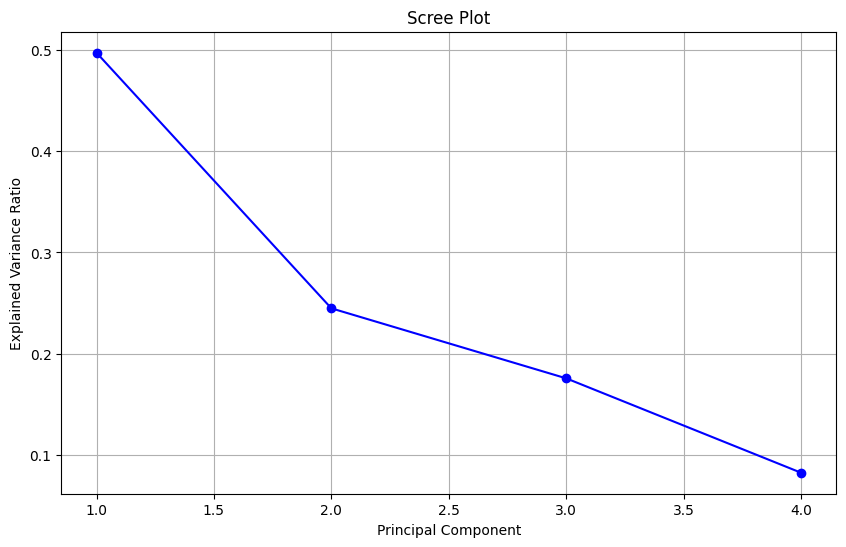

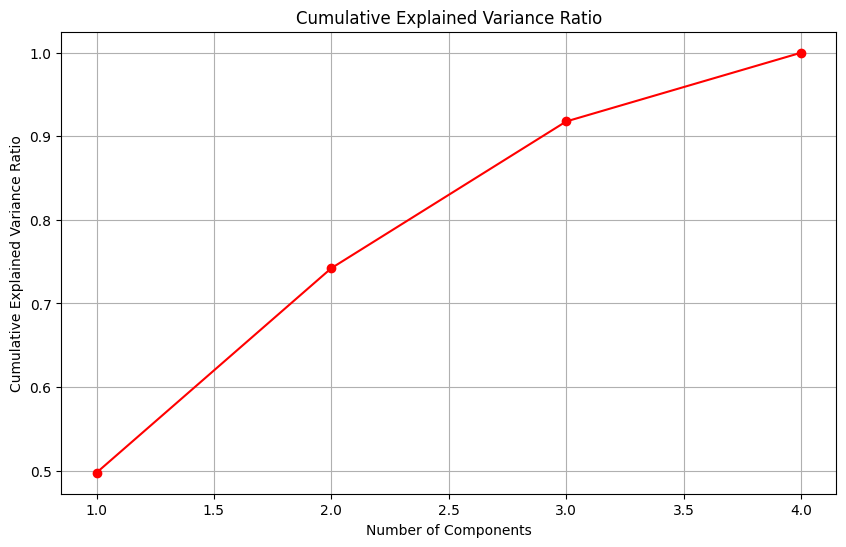

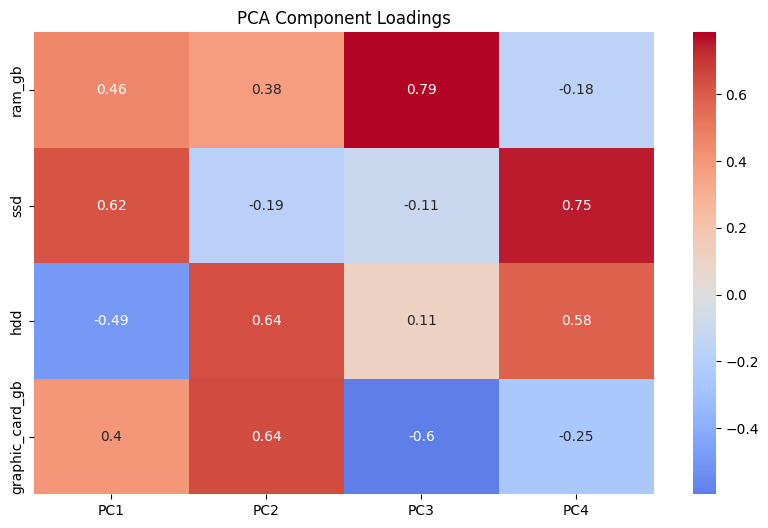

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Load and prepare data
df = pd.read_csv('../Ensemble/voting/laptopPrice.csv')

# Select numeric features
X = df[['ram_gb', 'ssd', 'hdd', 'graphic_card_gb']]

# Clean and convert data
X['ram_gb'] = X['ram_gb'].str.replace(' GB', '').astype(float)
X['ssd'] = X['ssd'].str.replace(' GB', '').astype(float) 
X['hdd'] = X['hdd'].str.replace(' GB', '').astype(float)
X['graphic_card_gb'] = X['graphic_card_gb'].str.replace(' GB', '').astype(float)

y = df['Price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print results
print("Explained variance ratio for each component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f}")

print("\nCumulative explained variance ratio:")
print(np.cumsum(explained_variance_ratio))

# Get component loadings
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2', 'PC3', 'PC4'],
    index=X.columns
)
print("\nComponent loadings:")
print(loadings)

# Create scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Create cumulative variance plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), 'ro-')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

# Create heatmap of component loadings
plt.figure(figsize=(10, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title('PCA Component Loadings')
plt.show()
